Import libraries

In [1]:
import os
import sys
from getpass import getpass
import git
import torch.optim as optim

Configure environment

In [2]:
os.environ["ENVIRONMENT"] = "mac"
os.environ["REPO_DIR"] = git.Repo(search_parent_directories=True).git.rev_parse("--show-toplevel")
os.environ["ROOT_DIR"] = os.path.abspath(os.path.join(os.getenv("REPO_DIR"), os.pardir))
os.environ["MODEL_ID"] = "32offjns"
os.environ["MODEL_DIR"] = f"{os.getenv('REPO_DIR')}/models/model_{os.getenv('MODEL_ID')}"

Import Repository Resources

In [3]:
sys.path.insert(0, f"{os.getenv('REPO_DIR')}/src")
from helpers import *

sys.path.insert(0, f"{os.getenv('MODEL_DIR')}/src")
from methods import *
from architecture import *
from dataset import *

Download Datasets

In [4]:
dbx_access_token = getpass("Enter your DropBox access token: ")

In [5]:
download_datasets_from_dropbox(
    dbx_access_token = dbx_access_token,
    include_all_datasets = True,
    use_thread = True
)

Code

In [33]:
num_epochs = 10
batch_size = 32
val_size = 50

In [34]:
device = set_device()
model = initialize_model(device=device, dbx_access_token=dbx_access_token, lookback={'count': 0, 'stride': 0})

train_dataset, val_dataset = create_datasets(
    device = device,
    include_all_datasets = True,
    lookback={'count': 0, 'stride': 0}
)

train_dataloader, val_dataloader = create_dataloaders(
    train_dataset = train_dataset,
    val_dataset = val_dataset,

    batch_size = batch_size,
)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Could not find GPU! Using CPU only.
Downloaded model weights from Dropbox.


In [36]:
model, train_loss_hist, val_performance_hist, best_val_performance = training_loop(
    model = model,
    criterion = criterion,
    optimizer = optimizer,
    train_dataloader = train_dataloader,
    val_dataloader = val_dataloader,
    dbx_access_token = dbx_access_token,
    num_epochs = num_epochs,
    critiqueing_metric = "Mean Dice Coefficient",
    auto_stop = True
)

[EPOCH 1/10]  Train Loss: 0.4367  <>  Val Accuracy: 27.72%  <>  Val Mean IoU: 12.08%
[EPOCH 5/10]  Train Loss: 0.4267  <>  Val Accuracy: 24.70%  <>  Val Mean IoU: 10.84%
[EPOCH 10/10]  Train Loss: 0.3893  <>  Val Accuracy: 22.66%  <>  Val Mean IoU: 10.15%


Training done!
10 epochs completed
Final Model Metrics:  Train Loss: 0.3893  <>  Val Accuracy: 22.66%  <>  Val Mean IoU: 10.15%

Uploaded model weights to Dropbox.


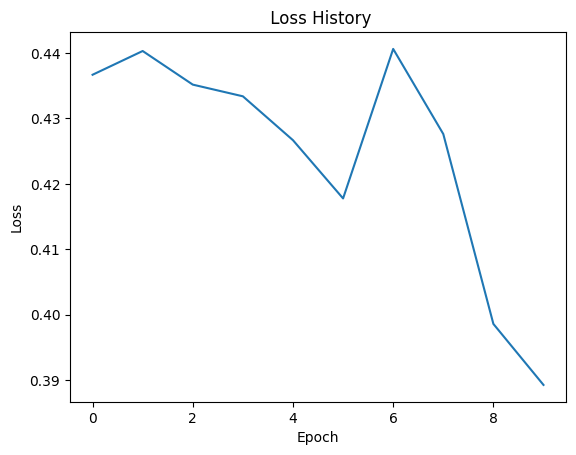

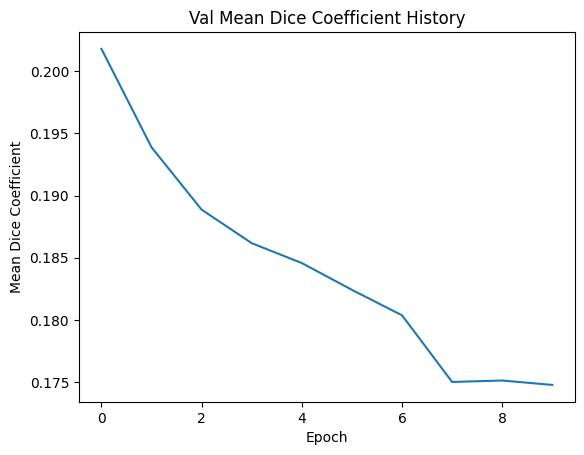

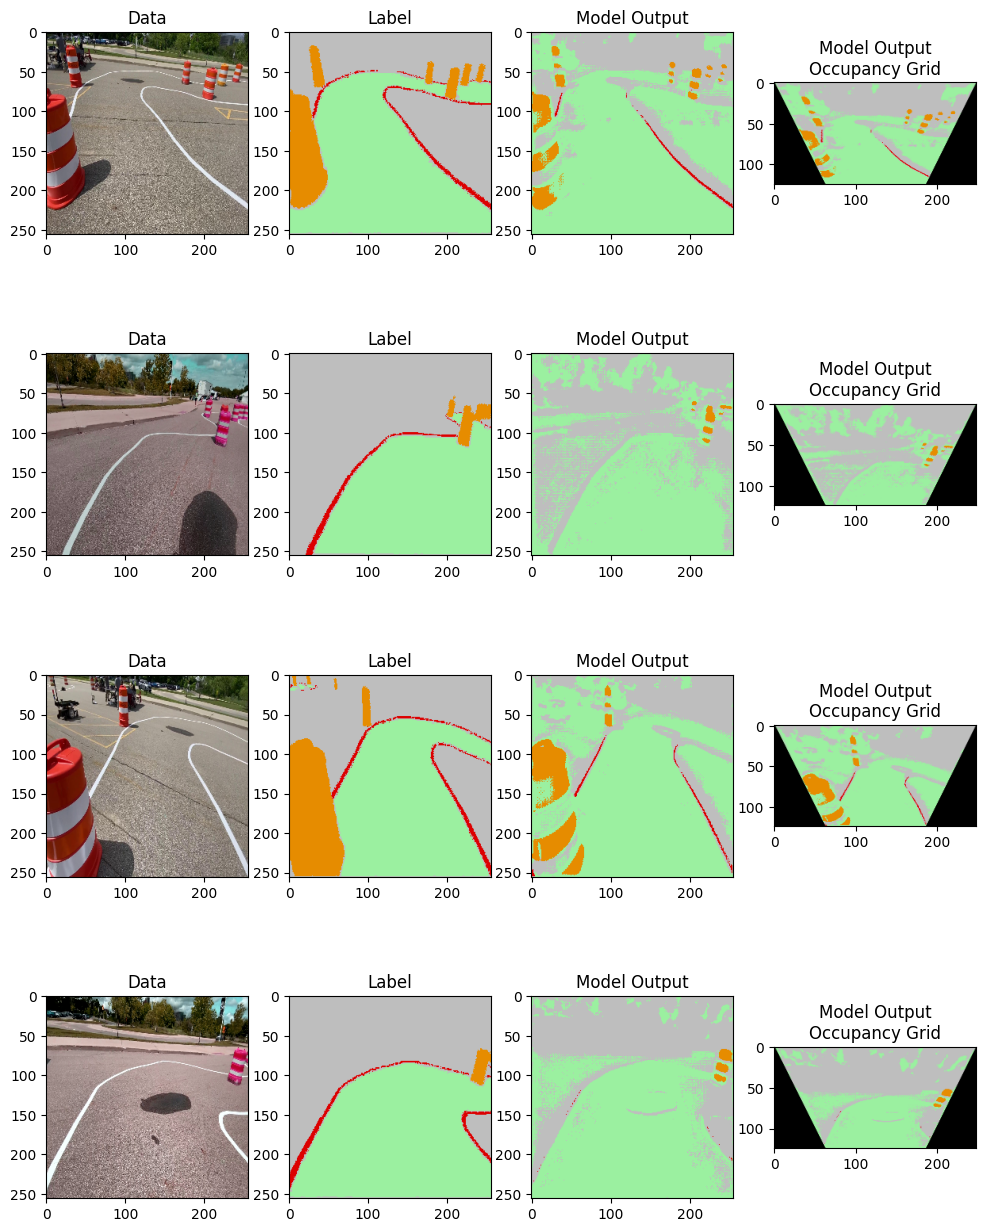

In [37]:
graph_loss_history(train_loss_hist)

graph_performance_history(
    performance_hist = val_performance_hist,
    split = 'Val',
    metrics = ["Mean Dice Coefficient"]
)

show_sample_results(
    model = model,
    dataset = train_dataset,
    device = device,
)



comp24_walkthrough metrics:
	Accuracy: 0.2313
	Background Precision: 0.4535
	Background Recall: 0.2420
	Background Specificity: 0.7487
	Background F1 Score: 0.3156
	Background IoU: 0.1873
	Background Dice Coefficient: 0.3156
	Lane Lines Precision: 0.0306
	Lane Lines Recall: 0.2365
	Lane Lines Specificity: 0.7505
	Lane Lines F1 Score: 0.0542
	Lane Lines IoU: 0.0279
	Lane Lines Dice Coefficient: 0.0542
	Drivable Area Precision: 0.4858
	Drivable Area Recall: 0.2142
	Drivable Area Specificity: 0.8020
	Drivable Area F1 Score: 0.2973
	Drivable Area IoU: 0.1746
	Drivable Area Dice Coefficient: 0.2973
	Cones Precision: 0.0396
	Cones Recall: 0.3047
	Cones Specificity: 0.7020
	Cones F1 Score: 0.0700
	Cones IoU: 0.0363
	Cones Dice Coefficient: 0.0700
	Mean IoU: 0.1065
	Mean Dice Coefficient: 0.1843

Metrics saved in performance.json for benchmark "comp24_walkthrough".


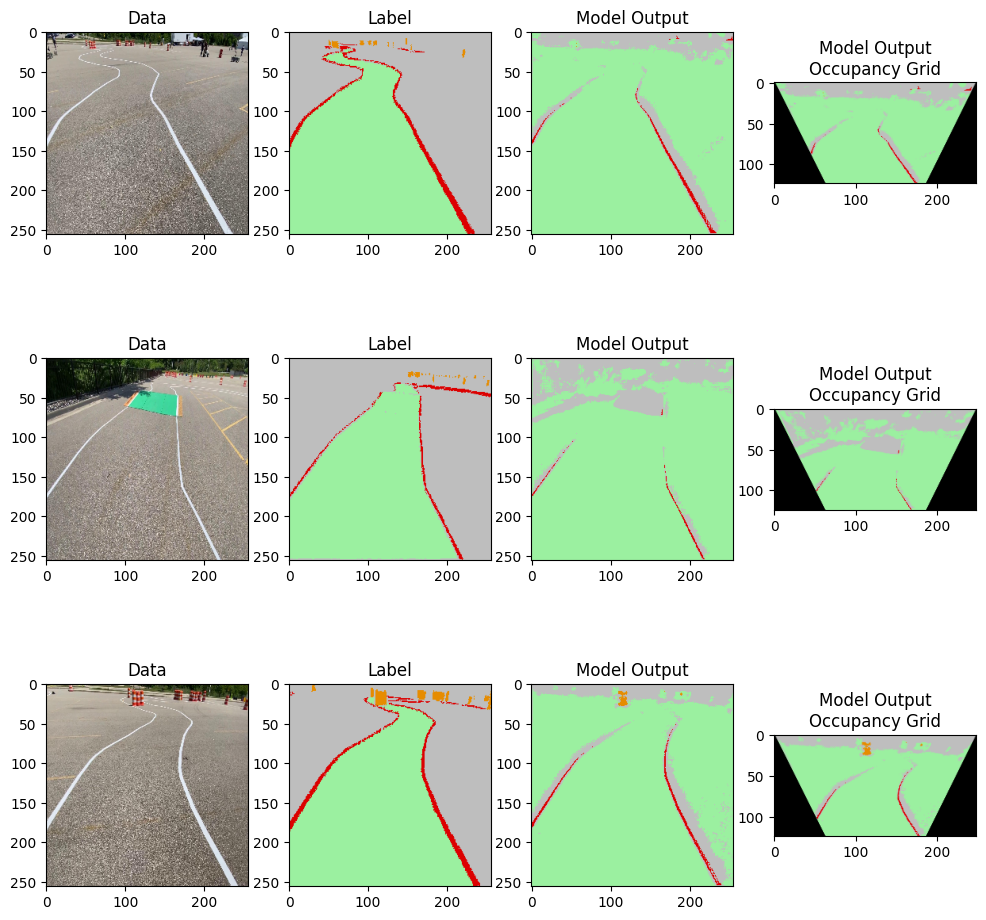

In [38]:
test_model_on_benchmarks(
    model = model,
    device = device,
    all_benchmarks = True,
    report_results = True,
    lookback= {'count': 0, 'stride': 0}
)